# PROJECT 2: 
## MODEL ANALYSIS PROJECT# Model Project

ProgEcon: Project 2

Group: Nikolaj and Fanny

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import modelproject
from Worker import WorkerClass
from Government import GovernmentClass
#test1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Labor supply

## 1.1 Numerical optimizer vs root-finder

__Summary of Findings :__

For all values of $\epsilon \in \{1.0, 0.75, 0.5\}$ the numerical optimizer and the root-finder produce nearly the same optimal labor supply. As $\epsilon$ decreases, the disutility of labor becomes weaker and the optimal labor supply increases. At $\epsilon =0.5$ the upper bound is reached. 

The utility and FOC plots confirm this: both the utility maximum and the zero of the FOC shift to higher labor levels as $\epsilon $ falls. The optimizer handles boundary solutions more reliably, while the root-finder is faster for interior solutions. Overall, both methods are consistent and yield identical results.

epsilon = 1.0
  ell* (optimizer):   8.265578
  ell* (root finder): 8.265578



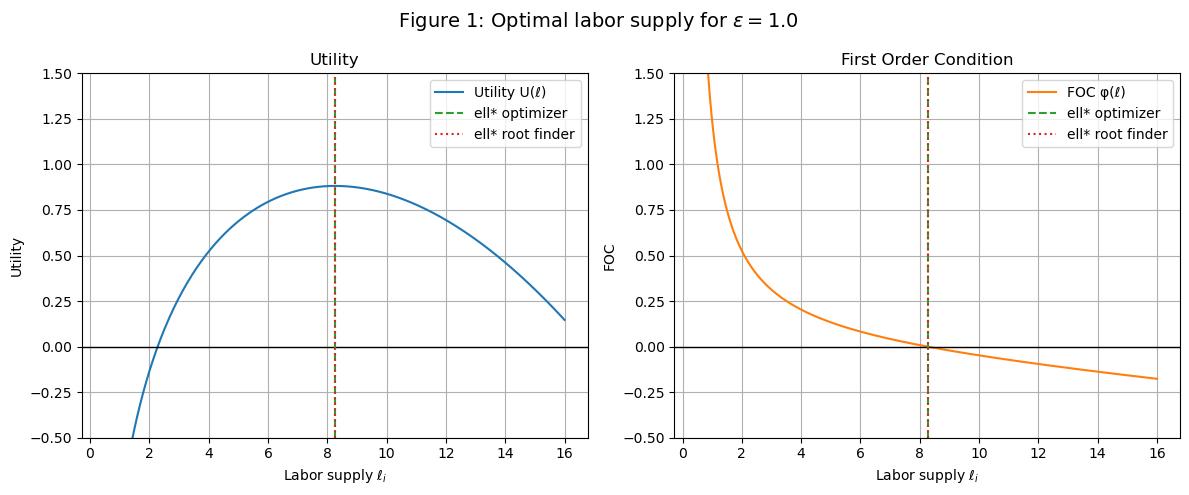

epsilon = 0.75
  ell* (optimizer):   11.136048
  ell* (root finder): 11.136048



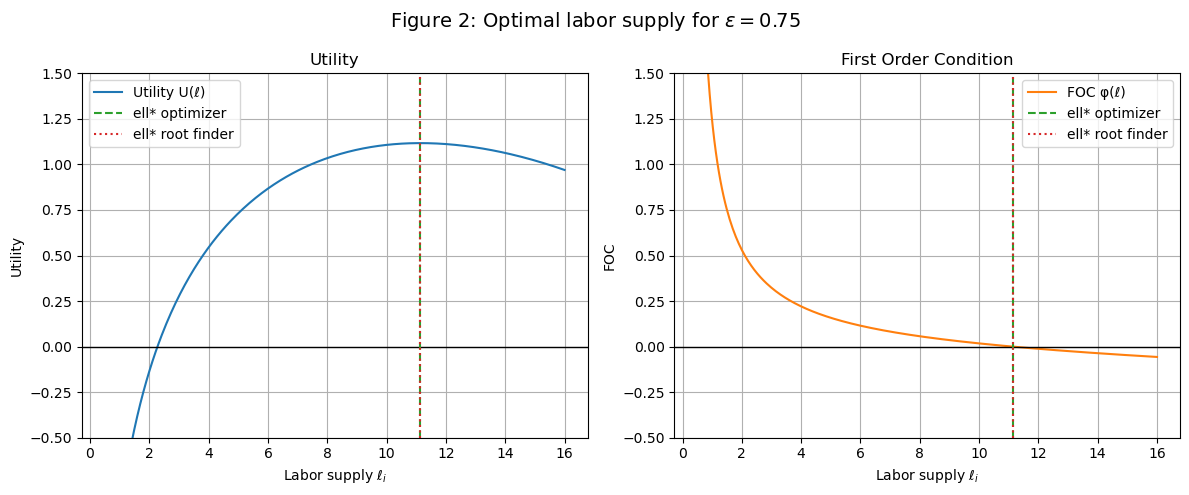

epsilon = 0.5
  ell* (optimizer):   15.999996
  ell* (root finder): 16.000000



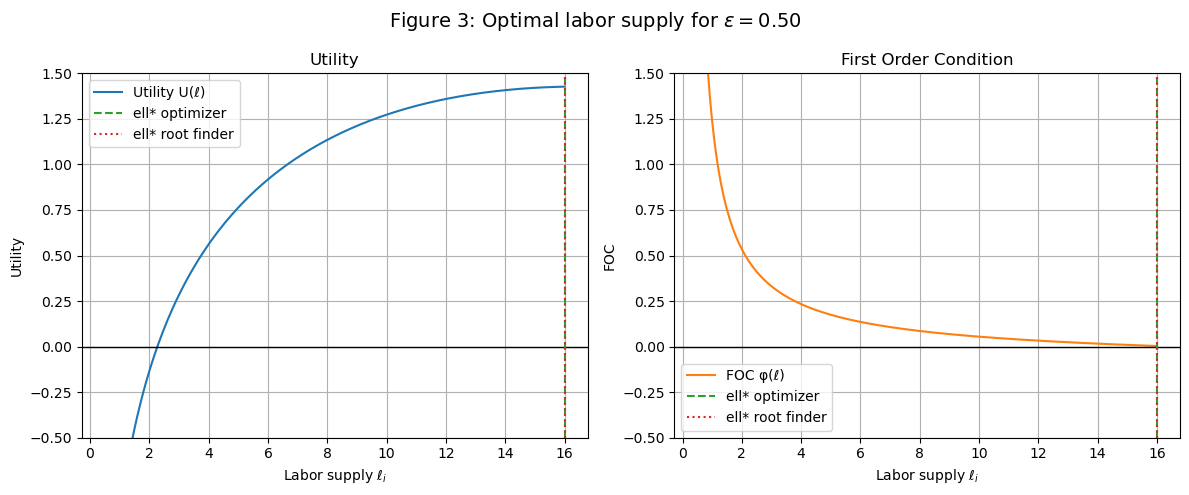

In [13]:
worker = WorkerClass()
p = 1.0

worker.plot_for_epsilon(1.0,  p, r' Figure 1: Optimal labor supply for $\epsilon = 1.0$')
worker.plot_for_epsilon(0.75, p, r'Figure 2: Optimal labor supply for $\epsilon = 0.75$')
worker.plot_for_epsilon(0.50, p, r'Figure 3: Optimal labor supply for $\epsilon = 0.50$')


## 1.2 Labor supply function

__Summary of Findings :__
Figure 4 shows that positive and negative lump-sum taxes affect labor supply in opposite directions, with a positive tax increasing hours worked and a negative tax reducing them.

Higher productivity increases the effective wage, generating both substitution and income effects. In this model, the income effect dominates, so labor supply varies only weakly with productivity. A positive lump-sum tax raises labor supply, especially for low-productivity workers, while a lump-sum transfer reduces labor supply through an income effect.


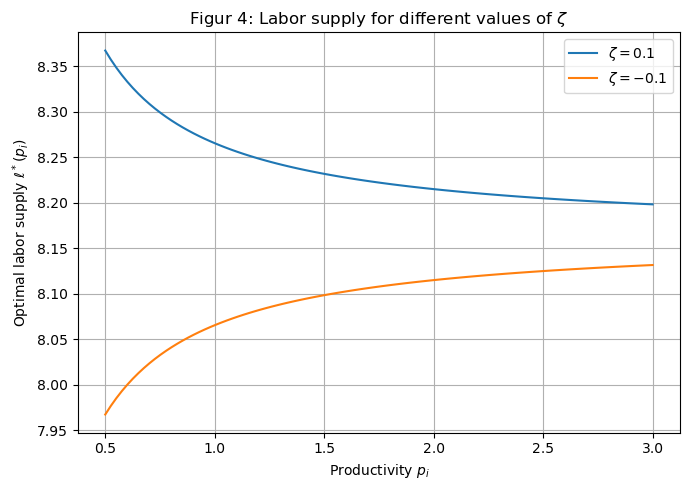

In [14]:
worker.plot_labor_supply(0.10, -0.10) 

# 2. Public good

## 2.1 Tax revenue and SocialWelfare Function

For τ = 0.50 and ζ = 0.10, we draw productivities, solve households’ labor supply problems, and compute total tax revenue and social welfare. The resulting values of T and SWF are reported below

In [15]:
from Government import GovernmentClass

zeta_values = [-0.1, 0.0, 0.1]
tau = 0.50  

for z in zeta_values:
    gov = GovernmentClass()
    gov.par.tau = tau
    gov.par.zeta = z

    gov.draw_productivities()
    gov.solve_workers()

    T = gov.tax_revenue()
    SWF = gov.SWF()

    print(f"zeta = {z}: T = {T:.3f}, SWF = {SWF:.3f}")

zeta = -0.1: T = 387.909, SWF = 178.741
zeta = 0.0: T = 402.885, SWF = 176.418
zeta = 0.1: T = 417.898, SWF = 174.045


In [16]:
T_results = {z: [] for z in zeta_values}
SWF_results = {z: [] for z in zeta_values}

for z in zeta_values:
    for tau in tau_values:
        gov = GovernmentClass()
        gov.par.tau = tau
        gov.par.zeta = z

        gov.draw_productivities()
        gov.solve_workers()

        T_results[z].append(gov.tax_revenue())
        SWF_results[z].append(gov.SWF())

tau_star = {}
SWF_star = {}

for z in zeta_values:
    SWF_array = np.array(SWF_results[z])
    idx = np.nanargmax(SWF_array)

    tau_star[z] = tau_values[idx]
    SWF_star[z] = SWF_array[idx]

    print(f"zeta = {z}: tau* = {tau_star[z]:.3f}, SWF* = {SWF_star[z]:.3f}")

NameError: name 'tau_values' is not defined

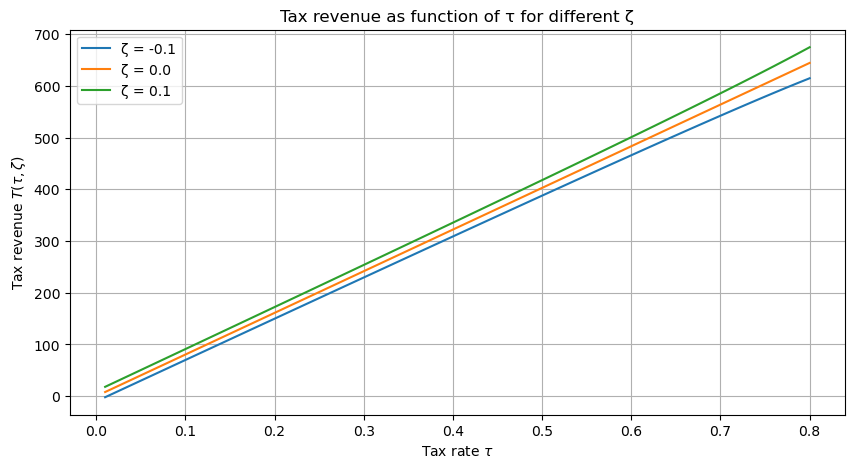

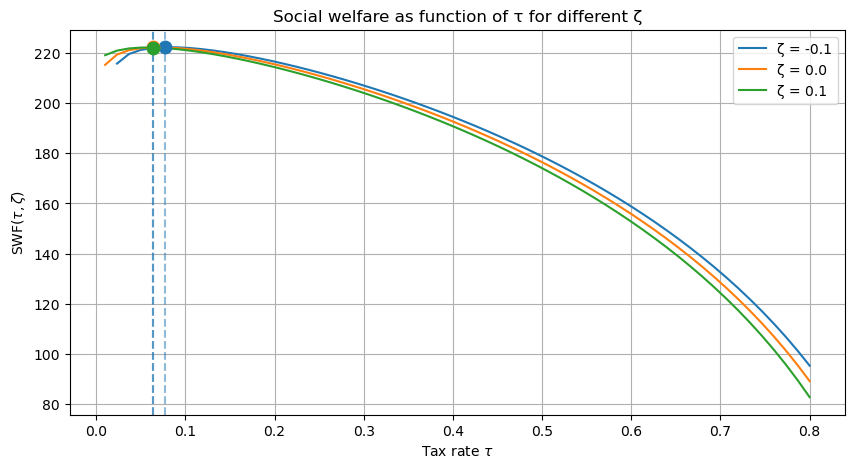

In [ ]:
plt.figure(figsize=(10,5))
for z in zeta_values:
    plt.plot(tau_values, T_results[z], label=f"ζ = {z}")

plt.xlabel(r"Tax rate $\tau$")
plt.ylabel(r"Tax revenue $T(\tau,\zeta)$")
plt.title("Tax revenue as function of τ for different ζ")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,5))

for z in zeta_values:
    plt.plot(tau_values, SWF_results[z], label=f"ζ = {z}")

    # marker maksimum
    plt.scatter(
        tau_star[z],
        SWF_star[z],
        s=80,
        zorder=5
    )

    plt.axvline(
        tau_star[z],
        linestyle="--",
        alpha=0.5
    )

plt.xlabel(r"Tax rate $\tau$")
plt.ylabel(r"SWF($\tau,\zeta$)")
plt.title("Social welfare as function of τ for different ζ")
plt.legend()
plt.grid(True)
plt.show()


## 2.2 Optimal tax system

__2.2.1 and 2.2.2__:



In [ ]:
from scipy.optimize import minimize
import numpy as np
from Government import GovernmentClass

# ============================================================
# Objective function: negative SWF
# ============================================================
def obj_SWF(x):
    tau, zeta = x

    # Impose simple bounds manually (Nelder-Mead has no bounds)
    if tau <= 0 or tau >= 1:
        return 1e12
    if zeta < -1 or zeta > 1:
        return 1e12

    gov = GovernmentClass()
    gov.par.tau = float(tau)
    gov.par.zeta = float(zeta)

    gov.draw_productivities()
    gov.solve_workers()

    SWF_val = gov.SWF()

    if SWF_val is None or not np.isfinite(SWF_val):
        return 1e12

    return -SWF_val


# ============================================================
# Run optimization
# ============================================================
x_init = np.array([0.3, 0.0])  # initial guess

result = minimize(
    obj_SWF,
    x0=x_init,
    method="Nelder-Mead",
    options={"maxiter": 3000, "xatol": 1e-6, "fatol": 1e-6}
)

tau_star, zeta_star = result.x

print("Optimal tau*  =", tau_star)
print("Optimal zeta* =", zeta_star)
print("Maximum SWF  =", -result.fun)


# ------------------------------------------------------------
# Different starting values
# ------------------------------------------------------------
start_points = [
    [0.1, -0.5],
    [0.3,  0.0],
    [0.6,  0.3],
    [0.8, -0.2]
]

solutions = []

for x0 in start_points:
    res = minimize(
        obj_SWF,
        x0=np.array(x0, dtype=float),
        method="Nelder-Mead",
        options={"maxiter": 3000}
    )

    solutions.append(res.x)
    print(f"Start {x0} -> tau* = {res.x[0]:.4f}, zeta* = {res.x[1]:.4f}")


# ------------------------------------------------------------
# Check convergence
# ------------------------------------------------------------
solutions = np.array(solutions)

tau_vals = solutions[:, 0]
zeta_vals = solutions[:, 1]

print("\nRange of solutions:")
print("tau*:  min =", tau_vals.min(), "max =", tau_vals.max())
print("zeta*: min =", zeta_vals.min(), "max =", zeta_vals.max())



Optimal tau*  = 0.13678740594166816
Optimal zeta* = -0.5235271705940003
Maximum SWF  = 222.38403246698252
Start [0.1, -0.5] -> tau* = 0.1368, zeta* = -0.5236
Start [0.3, 0.0] -> tau* = 0.1368, zeta* = -0.5235
Start [0.6, 0.3] -> tau* = 0.1367, zeta* = -0.5232
Start [0.8, -0.2] -> tau* = 0.1368, zeta* = -0.5235

Range of solutions:
tau*:  min = 0.13674224171227 max = 0.1367995572950169
zeta*: min = -0.5236368014622717 max = -0.5232413438290446


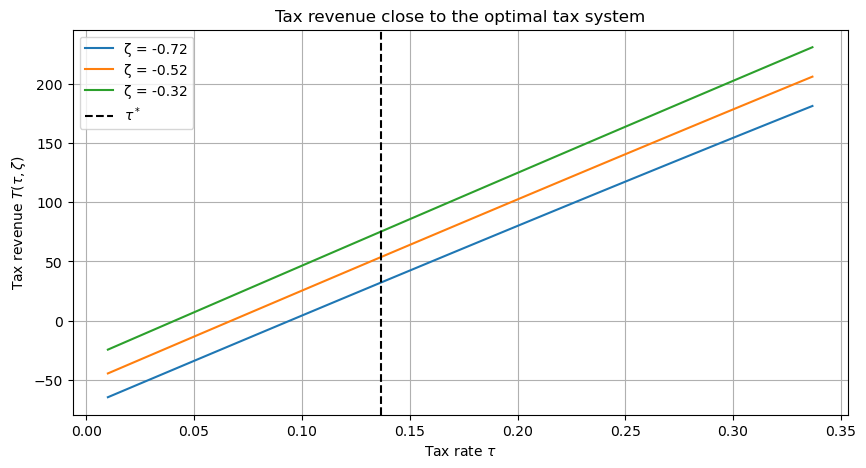

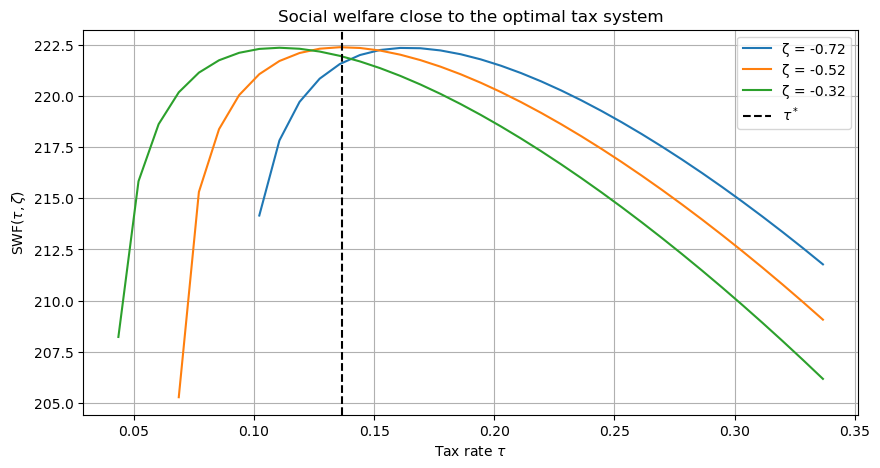

In [ ]:
#Opgave 2.2.3

import numpy as np
import matplotlib.pyplot as plt
from Government import GovernmentClass

# Local grid around optimum
tau_values = np.linspace(
    max(0.01, tau_star - 0.2),
    min(0.99, tau_star + 0.2),
    40
)

zeta_values = [
    zeta_star - 0.2,
    zeta_star,
    zeta_star + 0.2
]

T_results = {z: [] for z in zeta_values}
SWF_results = {z: [] for z in zeta_values}

for z in zeta_values:
    for tau in tau_values:
        gov = GovernmentClass()
        gov.par.tau = tau
        gov.par.zeta = z

        gov.draw_productivities()
        gov.solve_workers()

        T_results[z].append(gov.tax_revenue())
        SWF_results[z].append(gov.SWF())

plt.figure(figsize=(10,5))
for z in zeta_values:
    plt.plot(tau_values, T_results[z], label=f"ζ = {z:.2f}")

plt.axvline(tau_star, linestyle="--", color="black", label=r"$\tau^*$")
plt.xlabel(r"Tax rate $\tau$")
plt.ylabel(r"Tax revenue $T(\tau,\zeta)$")
plt.title("Tax revenue close to the optimal tax system")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
for z in zeta_values:
    plt.plot(tau_values, SWF_results[z], label=f"ζ = {z:.2f}")

plt.axvline(tau_star, linestyle="--", color="black", label=r"$\tau^*$")
plt.xlabel(r"Tax rate $\tau$")
plt.ylabel(r"SWF($\tau,\zeta$)")
plt.title("Social welfare close to the optimal tax system")
plt.legend()
plt.grid(True)
plt.show()


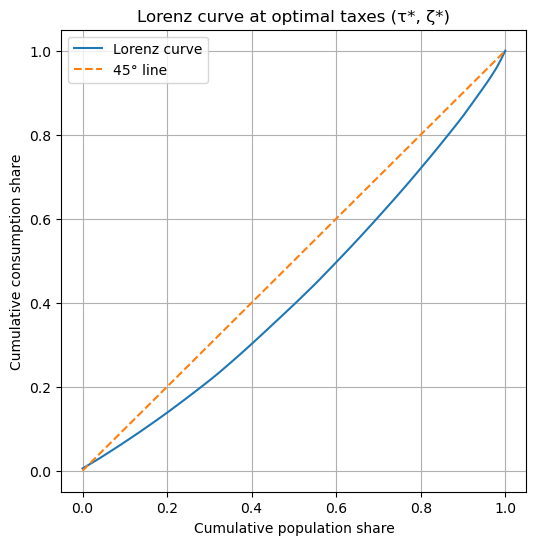

In [ ]:

# ============================================================
# 5. Lorenz curve for consumption at optimum
# ============================================================

gov = GovernmentClass()
gov.par.tau = tau_star
gov.par.zeta = zeta_star

gov.draw_productivities()
gov.solve_workers()

pi = gov.sol.pi
l = gov.sol.l
c = (1 - tau_star) * gov.par.w * pi * l - zeta_star  # FIXED: missing * signs

# Lorenz curve
c_sorted = np.sort(c)
cumsum_rel = np.cumsum(c_sorted) / np.sum(c_sorted)
pop = np.linspace(0, 1, len(c))

plt.figure(figsize=(6,6))
plt.plot(pop, cumsum_rel, label="Lorenz curve")
plt.plot([0,1], [0,1], '--', label="45° line")
plt.xlabel("Cumulative population share")
plt.ylabel("Cumulative consumption share")
plt.title("Lorenz curve at optimal taxes (τ*, ζ*)")
plt.legend()
plt.grid(True)
plt.show()

# 3. Top tax

## 3.1 Labor supply

__Summary of Findings :__

For all values of p, the numerical optimizer and the four-step FOC method yield the same optimal labor supply.
The utility function has a single interior maximum, and the FOC crosses zero at exactly this point.
In all cases, the optimal labor supply lies below the top-tax kink, so the pre–top-tax FOC determines the solution. After the kink, the FOC is strictly negative, implying no interior optimum in that region.
Thus, while the top tax changes the shape of the FOC, it does not affect the optimal labor choice.

As p increases, the optimal labor supply decreases, reflecting weaker labor incentives due to a higher effective tax burden, while the top tax itself does not change the location of the optimum.

ℓ* (optimizer) = 8.265577318, U = 0.882059849
ℓ* (4-step FOC) = 8.265578159, U = 0.882059849


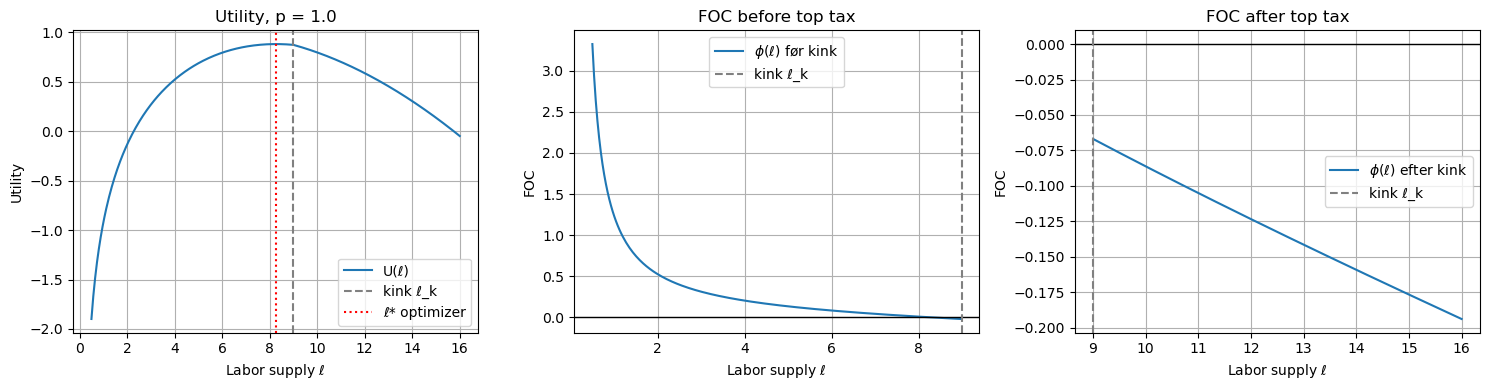

ℓ* (optimizer) = 7.659575607, U = 1.041586394
ℓ* (4-step FOC) = 7.659574468, U = 1.041586433


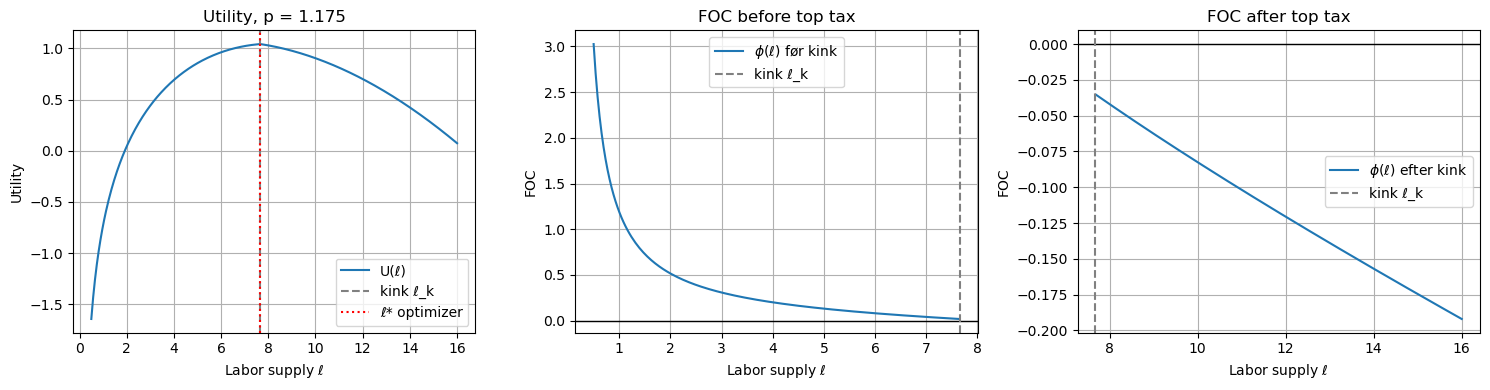

ℓ* (optimizer) = 6.491718557, U = 1.214602210
ℓ* (4-step FOC) = 6.491717766, U = 1.214602210


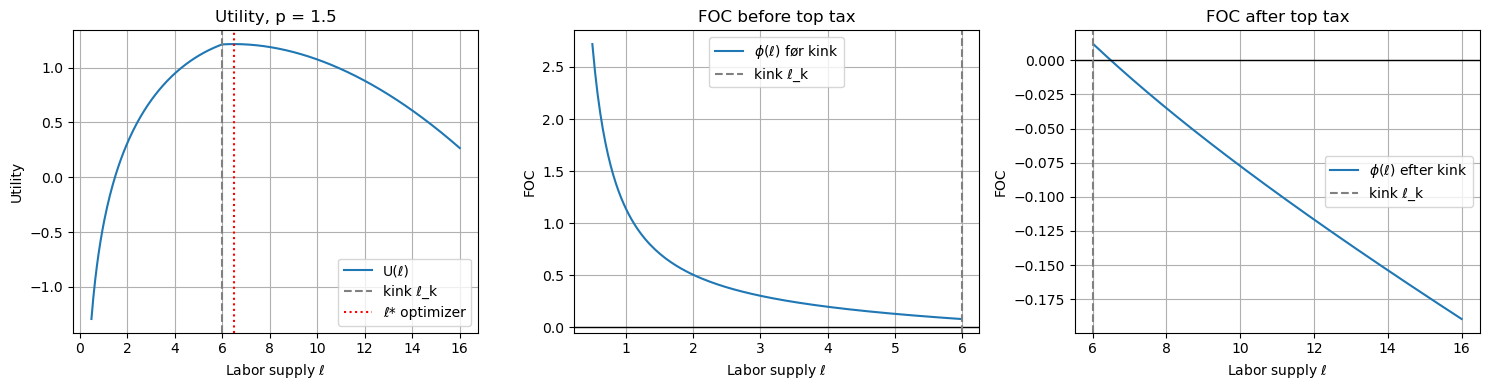

In [ ]:
from Worker import WorkerClass
worker = WorkerClass()

worker.plot_top_tax(1.0)
worker.plot_top_tax(1.175)
worker.plot_top_tax(1.5)

## 3.2 Labor supply function

__Summary of Findings :__

Labor supply increases with productivity. Almost no one chooses the before-kink solution, a small share works Optimal labor supply increases with productivity but shows a discrete drop around the top-tax kink due to the higher marginal tax rate. 

Consumption rises monotonically with productivity, with a clear flattening near the kink reflecting reduced after-tax returns.

Most workers choose the after-kink region (64%), while smaller shares locate before the kink (24%) or exactly at it (12%), indicating localized behavioral effects of the top tax.

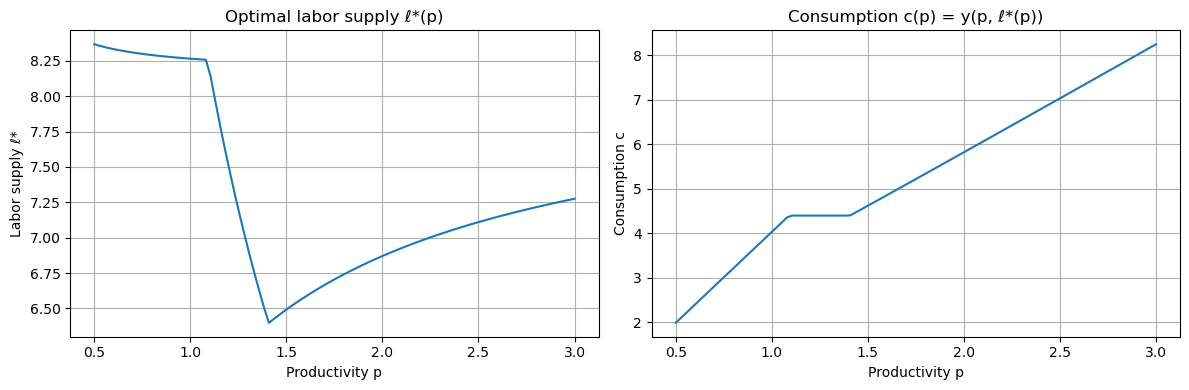

Share with ℓ* = ℓ^b (before kink): 0.240
Share with ℓ* = ℓ^k (at kink):      0.120
Share with ℓ* = ℓ^a (after kink):   0.640


In [ ]:
worker.plot_labor_and_consumption_top()
share_b, share_k, share_a = worker.region_proportions_top()

## 3.3 Public good

In [ ]:
from Government import GovernmentClass

# Initialize government model
gov = GovernmentClass()

# First, compute baseline SWF with current parameters
gov.draw_productivities()
gov.solve_workers()
baseline_swf = gov.SWF()

# Find optimal omega and kappa
results = gov.find_optimal_public_good(
    omega_vals=np.linspace(0, 1, 25),
    kappa_vals=np.linspace(0, 20, 25),
    baseline_swf=baseline_swf,
    do_print=True
)

# Plot results
gov.plot_public_good_results(results)

# Print summary
print(f"\nImprovement in SWF: {results['improvement']:.6f}")
print(f"This means the public good provides an improvement!")

NameError: name 'np' is not defined

# 4. Extension